In [112]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn.metrics import mean_squared_error

In [113]:
df_la = pd.read_csv('./data/LA_data/air_walk_merged_LA.csv')

In [114]:
df_la['BLKGRPCE'].value_counts()

1    269
2    161
3    103
4     54
5     18
6      7
Name: BLKGRPCE, dtype: int64

In [115]:
df_la['TRACTCE'].value_counts()

460501    11
701201     8
209200     7
460700     7
460100     5
          ..
195201     1
650300     1
544001     1
187102     1
554404     1
Name: TRACTCE, Length: 408, dtype: int64

df_la['TRACTCE'].value_counts()

In [116]:
pd.set_option('display.max_columns', 200)

In [117]:
df_la.head(2)

,id,lat,lon,name,location_type,pm_2.5,temp_f,temp_c,humidity,pressure,last_seen,model,hidden,flagged,downgraded,age,is_owner,10min_avg,30min_avg,1hour_avg,6hour_avg,1day_avg,1week_avg,fips_id,OBJECTID,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CSA_Name,CBSA,CBSA_Name,CBSA_POP,CBSA_EMP,CBSA_WRK,Ac_Total,Ac_Water,Ac_Land,Ac_Unpr,TotPop,CountHU,HH,P_WrkAge,AutoOwn0,Pct_AO0,AutoOwn1,Pct_AO1,AutoOwn2p,Pct_AO2p,Workers,R_LowWageWk,R_MedWageWk,R_HiWageWk,R_PCTLOWWAGE,TotEmp,E5_Ret,E5_Off,E5_Ind,E5_Svc,E5_Ent,E8_Ret,E8_off,E8_Ind,E8_Svc,E8_Ent,E8_Ed,E8_Hlth,E8_Pub,E_LowWageWk,E_MedWageWk,E_HiWageWk,E_PctLowWage,D1A,D1B,D1C,D1C5_RET,D1C5_OFF,D1C5_IND,D1C5_SVC,D1C5_ENT,D1C8_RET,D1C8_OFF,D1C8_IND,D1C8_SVC,D1C8_ENT,D1C8_ED,D1C8_HLTH,D1C8_PUB,D1D,D1_FLAG,D2A_JPHH,D2B_E5MIX,D2B_E5MIXA,D2B_E8MIX,D2B_E8MIXA,D2A_EPHHM,D2C_TRPMX1,D2C_TRPMX2,D2C_TRIPEQ,D2R_JOBPOP,D2R_WRKEMP,D2A_WRKEMP,D2C_WREMLX,D3A,D3AAO,D3AMM,D3APO,D3B,D3BAO,D3BMM3,D3BMM4,D3BPO3,D3BPO4,D4A,D4B025,D4B050,D4C,D4D,D4E,D5AR,D5AE,D5BR,D5BE,D5CR,D5CRI,D5CE,D5CEI,D5DR,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area
0,47959,33.767104,-118.198957,100 Oceangate,inside,0.82,86.0,30.000000,17.0,1012.79,2022-02-12 21:40:46,PMS5003+PMS5003+BME280,False,False,False,0,False,0.86,0.81,1.21,2.22,1.62,2.35,60375760012,36060,6.037576e+10,6,37,576001,2,348.0,"Los Angeles-Long Beach, CA",31080.0,"Los Angeles-Long Beach-Anaheim, CA",13262234,6249699,5825012,445.189692,166.96547,278.224222,257.310620,2779,1960.0,1667.0,0.787,133,0.079784,921,0.552490,613,0.367726,1135,177,359,599,0.155947,36518,127,10751,16461,5522,3657,127,6243,16461,4247,3657,8,1267,4508,4063,6585,25870,0.111260,7.617253,10.800176,141.921853,0.493567,41.782185,63.973263,21.460443,14.212394,0.493567,24.262504,63.973263,16.505343,14.212394,0.031091,4.924010,17.519681,149.539106,0,21.906419,0.779748,0.779748,0.739722,0.739722,0.769949,0.727922,0.693137,0.385297,0.141436,0.060287,0.031081,0.379493,47.203383,9.815321,7.468784,29.919279,350.517864,46.006059,23.00303,36.804847,292.138476,103.513633,91.2,0.332764,0.713611,25.33,58.266674,0.009115,262455,258680,124964,150137,0.000106,0.383448,0.000119,0.503080,0.000068,0.104685,0.000111,0.149839,18,17,20,20,19.166667,6972.639103,1.801666e+06
1,94345,34.138132,-118.009183,1230 S Mayflower (Inside),inside,0.00,94.0,34.444444,11.0,1002.99,2022-02-12 21:40:24,PMS5003+PMS5003+BME280,False,False,False,1,False,0.22,0.30,0.35,1.32,1.10,2.25,60374309011,48853,6.037431e+10,6,37,430901,1,348.0,"Los Angeles-Long Beach, CA",31080.0,"Los Angeles-Long Beach-Anaheim, CA",13262234,6249699,5825012,111.226876,0.00000,111.226876,111.226876,1509,593.0,548.0,0.654,16,0.029197,252,0.459854,280,0.510949,840,198,280,362,0.235714,817,377,22,95,243,80,377,22,95,104,80,85,54,0,234,383,200,0.286414,5.331445,13.566865,7.345347,3.389469,0.197794,0.854110,2.184724,0.719251,3.389469,0.197794,0.854110,0.935026,0.719251,0.764204,0.485494,0.000000,12.676792,0,1.490876,0.803137,0.803137,0.827030,0.773923,0.807735,0.774577,0.841330,0.500957,0.702494,0.986119,1.028152,0.972241,27.355800,1.515533,6.568010,19.272257,182.263862,0.000000,46.03204,23.016020,115.080100,51.786045,0.0,0.020107,0.393098,5.33,30.668847,0.003532,275265,256737,118588,86030,0.000111,0.402163,0.000118,0.499301,0.000064,0.099344,0.000064,0.085859,19,18,19,20,19.166667,3024.620797,4.501286e+05


In [118]:
df_la.describe()

,id,lat,lon,pm_2.5,temp_f,temp_c,humidity,pressure,age,10min_avg,30min_avg,1hour_avg,6hour_avg,1day_avg,1week_avg,fips_id,OBJECTID,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CBSA,CBSA_POP,CBSA_EMP,CBSA_WRK,Ac_Total,Ac_Water,Ac_Land,Ac_Unpr,TotPop,CountHU,HH,P_WrkAge,AutoOwn0,Pct_AO0,AutoOwn1,Pct_AO1,AutoOwn2p,Pct_AO2p,Workers,R_LowWageWk,R_MedWageWk,R_HiWageWk,R_PCTLOWWAGE,TotEmp,E5_Ret,E5_Off,E5_Ind,E5_Svc,E5_Ent,E8_Ret,E8_off,E8_Ind,E8_Svc,E8_Ent,E8_Ed,E8_Hlth,E8_Pub,E_LowWageWk,E_MedWageWk,E_HiWageWk,E_PctLowWage,D1A,D1B,D1C,D1C5_RET,D1C5_OFF,D1C5_IND,D1C5_SVC,D1C5_ENT,D1C8_RET,D1C8_OFF,D1C8_IND,D1C8_SVC,D1C8_ENT,D1C8_ED,D1C8_HLTH,D1C8_PUB,D1D,D1_FLAG,D2A_JPHH,D2B_E5MIX,D2B_E5MIXA,D2B_E8MIX,D2B_E8MIXA,D2A_EPHHM,D2C_TRPMX1,D2C_TRPMX2,D2C_TRIPEQ,D2R_JOBPOP,D2R_WRKEMP,D2A_WRKEMP,D2C_WREMLX,D3A,D3AAO,D3AMM,D3APO,D3B,D3BAO,D3BMM3,D3BMM4,D3BPO3,D3BPO4,D4A,D4B025,D4B050,D4C,D4D,D4E,D5AR,D5AE,D5BR,D5BE,D5CR,D5CRI,D5CE,D5CEI,D5DR,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area
count,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,6.120000e+02,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,6.120000e+02,612.000000,6.120000e+02,612.0,612.0,612.000000,612.000000,612.0,612.0,612.0,612.0,612.0,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.0,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,6.120000e+02,612.000000,6.120000e+02,612.000000,6.120000e+02,612.000000,6.120000e+02,612.000000,6.120000e+02,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,6.120000e+02
mean,58879.408497,34.062896,-118.299261,1.837141,91.222222,32.901235,12.049020,992.248644,6.797660e+03,1.876046,2.030948,2.598562,5.431601,5.267990,8.561029,6.037445e+10,43480.160131,6.037445e+10,6.0,37.0,444810.800654,2.039216,348.0,31080.0,13262234.0,6249699.0,5825012.0,906.272835,22.651195,883.621640,586.744648,1729.784314,695.246732,633.094771,0.610505,41.946078,0.058249,206.544118,0.301250,384.604575,0.635600,758.433007,170.367647,201.754902,386.310458,0.225147,1771.089869,86.799020,353.629085,255.235294,888.571895,186.854575,86.799020,335.192810,255.235294,461.650327,186.854575,292.630719,134.290850,18.436275,329.565359,489.049020,952.475490,0.290260,5.692428,13.450390,10.494343,0.585571,1.856626,0.920296,5.876873,1.254977,0.585571,1.737182,0.920296,2.422537,1.254977,2.287525,1.166811,0.119444,16.186771,0.0,4.429835,0.641252,0.589828,0.725700,0.617534,0.538765,0.518472,0.558554,0.469594,0.366404,0.475032,5.191024,0.321398,22.010777,1.573531,3.222742,17.214504,119.049931,4.057451,21.043861,11.752745,86.189383,35.772613,-24187.591520,0.030951,0.106825,-14201.808382,-14130.036300,-14215.524776,291599.973856,246856.415033,1.909302e+05,115728.075163,1.175210e-04,0.426029,1.130930e-04,0.480085,-2.450956e+04,-24509.378345,-2.450956e+04,-24509.418864,11.388889,12.790850,13.611111,12.820261,12.840414,6701.781169,3.667636e+06
std,37449.431633,0.161691,0.189384,4.216692,9.767156,5.426198,11.507525,46.605089,1.016282e+05,4.081646,4.058283,4.218822,5.972176,5.755747,5.649667,2.230341e+06,6802.741253,2.230341e+06,0.0,0.0,223034.046

In [119]:
df_la['location_type'].value_counts()

outside    474
inside     137
Name: location_type, dtype: int64

In [120]:
df_la['CBSA'].value_counts()

31080.0    612
Name: CBSA, dtype: int64

In [121]:
df_la.isna().sum()

id               0
lat              0
lon              0
name             0
location_type    1
                ..
D3B_Ranked       0
D4A_Ranked       0
NatWalkInd       0
Shape_Length     0
Shape_Area       0
Length: 140, dtype: int64

In [122]:
"""
original list
This is a full list of variables that we can easily copy and add for eda and model building
drop_cols1 = [
    'id', 'lat', 'lon',  'name', 'location_type', 'pm_2.5','temp_f', 'temp_c', 'humidity', 'pressure', 'last_seen', 'model',
    'hidden', 'flagged', 'downgraded', 'age', 'is_owner', '10min_avg', '30min_avg',
    '1hour_avg', '6hour_avg', '1day_avg', '1week_avg', 'fips_id', 'OBJECTID', 'GEOID20', 'STATEFP',
    'COUNTYFP','TRACTCE', 'BLKGRPCE', 'CSA', 'CSA_Name', 'CBSA', 'CBSA_Name', 'CBSA_POP', 'CBSA_EMP', 'CBSA_WRK', 
    'Ac_Total', 'Ac_Water', 'Ac_Land', 'Ac_Unpr', 'TotPop', 'CountHU', 'HH', 'P_WrkAge', 'AutoOwn0','Pct_AO0', 'AutoOwn1', 'Pct_AO1', 
    'AutoOwn2p','Pct_AO2p','Workers', 'R_LowWageWk', 'R_MedWageWk','R_HiWageWk', 'R_PCTLOWWAGE','TotEmp', 'E5_Ret', 'E5_Off','E5_Ind', 'E5_Svc', 'E5_Ent', 
    'E8_Ret', 'E8_off', 'E8_Ind', 'E8_Svc', 'E8_Ent', 'E8_Ed', 'E8_Hlth', 'E8_Pub', 'E_LowWageWk', 'E_MedWageWk', 'E_HiWageWk',
    'E_PctLowWage', 'D1A', 'D1B', 'D1C', 'D1C5_RET', 'D1C5_OFF', 'D1C5_IND', 'D1C5_SVC', 'D1C5_ENT',
    'D1C8_RET', 'D1C8_OFF', 'D1C8_IND', 'D1C8_SVC', 'D1C8_ENT', 'D1C8_ED', 'D1C8_HLTH', 'D1C8_PUB', 'D1D', 'D1_FLAG',
    'D2A_JPHH', 'D2B_E5MIX','D2B_E5MIXA', 'D2B_E8MIX', 'D2B_E8MIXA', 'D2A_EPHHM', 'D2C_TRPMX1', 'D2C_TRPMX2', 
    'D2C_TRIPEQ', 'D2R_JOBPOP', 'D2R_WRKEMP', 'D2A_WRKEMP', 'D2C_WREMLX', 'D3A', 'D3AAO', 'D3AMM', 'D3APO', 'D3B', 'D3BAO', 'D3BMM3',
    'D3BMM4', 'D3BPO3', 'D3BPO4', 'D4A', 'D4B025', 'D4B050', 'D4C', 'D4D', 'D4E', 'D5AR', 'D5AE', 'D5BR', 'D5BE', 'D5CR', 'D5CRI', 'D5CE',
    'D5CEI','D5DR', 'D5DRI', 'D5DE', 'D5DEI', 'D2A_Ranked', 'D2B_Ranked', 'D3B_Ranked', 'D4A_Ranked', 'NatWalkInd',
    'Shape_Length', 'Shape_Area'

]
"""

"\noriginal list\nThis is a full list of variables that we can easily copy and add for eda and model building\ndrop_cols1 = [\n    'id', 'lat', 'lon',  'name', 'location_type', 'pm_2.5','temp_f', 'temp_c', 'humidity', 'pressure', 'last_seen', 'model',\n    'hidden', 'flagged', 'downgraded', 'age', 'is_owner', '10min_avg', '30min_avg',\n    '1hour_avg', '6hour_avg', '1day_avg', '1week_avg', 'fips_id', 'OBJECTID', 'GEOID20', 'STATEFP',\n    'COUNTYFP','TRACTCE', 'BLKGRPCE', 'CSA', 'CSA_Name', 'CBSA', 'CBSA_Name', 'CBSA_POP', 'CBSA_EMP', 'CBSA_WRK', \n    'Ac_Total', 'Ac_Water', 'Ac_Land', 'Ac_Unpr', 'TotPop', 'CountHU', 'HH', 'P_WrkAge', 'AutoOwn0','Pct_AO0', 'AutoOwn1', 'Pct_AO1', \n    'AutoOwn2p','Pct_AO2p','Workers', 'R_LowWageWk', 'R_MedWageWk','R_HiWageWk', 'R_PCTLOWWAGE','TotEmp', 'E5_Ret', 'E5_Off','E5_Ind', 'E5_Svc', 'E5_Ent', \n    'E8_Ret', 'E8_off', 'E8_Ind', 'E8_Svc', 'E8_Ent', 'E8_Ed', 'E8_Hlth', 'E8_Pub', 'E_LowWageWk', 'E_MedWageWk', 'E_HiWageWk',\n    'E_PctLowWage', 'D1

In [123]:
#columns based on high correlation with 1week_avg from Airtons code
#keeping only = [
#    'humidity', 'pressure', 'location_type', '1week_avg', 
#    'CSA', 'D1A', 'D1B','D2B_E8MIXA', 'D2A_EPHHM',  'D3A',  'D3APO', 'D3B', 
#    'D3BPO4', 'D4A','D4B050', 'D5BR', 'D5BE', 'D5CRI',
#    'D5CEI','D5DR', 'D5DRI', 'D5DE', 'D5DEI', 'D3B_Ranked', 'D4A_Ranked', 'NatWalkInd',   
#]

drop_cols1 = [
    'id', 'lat', 'lon',  'name', 'pm_2.5','temp_f', 'temp_c', 'last_seen', 'model',
    'hidden', 'flagged', 'downgraded', 'age', 'is_owner', '10min_avg', '30min_avg',
    '1hour_avg', '6hour_avg', '1day_avg', 'fips_id', 'OBJECTID', 'GEOID20', 'STATEFP',
    'COUNTYFP','TRACTCE', 'BLKGRPCE', 'CSA_Name', 'CBSA', 'CBSA_Name', 'CBSA_POP', 'CBSA_EMP', 'CBSA_WRK', 
    'Ac_Total', 'Ac_Water', 'Ac_Land', 'Ac_Unpr', 'TotPop', 'CountHU', 'HH', 'P_WrkAge', 'AutoOwn0','Pct_AO0', 'AutoOwn1', 'Pct_AO1', 
    'AutoOwn2p','Pct_AO2p','Workers', 'R_LowWageWk', 'R_MedWageWk','R_HiWageWk', 'R_PCTLOWWAGE','TotEmp', 'E5_Ret', 'E5_Off','E5_Ind', 'E5_Svc', 'E5_Ent', 
    'E8_Ret', 'E8_off', 'E8_Ind', 'E8_Svc', 'E8_Ent', 'E8_Ed', 'E8_Hlth', 'E8_Pub', 'E_LowWageWk', 'E_MedWageWk', 'E_HiWageWk',
    'E_PctLowWage', 'D1C', 'D1C5_RET', 'D1C5_OFF', 'D1C5_IND', 'D1C5_SVC', 'D1C5_ENT',
    'D1C8_RET', 'D1C8_OFF', 'D1C8_IND', 'D1C8_SVC', 'D1C8_ENT', 'D1C8_ED', 'D1C8_HLTH', 'D1C8_PUB', 'D1D', 'D1_FLAG',
    'D2A_JPHH', 'D2B_E5MIX','D2B_E5MIXA', 'D2B_E8MIX', 'D2C_TRPMX1', 'D2C_TRPMX2', 
    'D2C_TRIPEQ', 'D2R_JOBPOP', 'D2R_WRKEMP', 'D2A_WRKEMP', 'D2C_WREMLX', 'D3AAO', 'D3AMM', 'D3BAO', 'D3BMM3',
    'D3BMM4', 'D3BPO3', 'D4B025', 'D4C', 'D4D', 'D4E', 'D5AR', 'D5AE', 'D5CR', 'D5CE',
    'D2A_Ranked', 'D2B_Ranked','Shape_Length', 'Shape_Area'

]

In [124]:
df_highcorr = df_la.drop(columns=drop_cols1)
df_highcorr.head(2)

,location_type,humidity,pressure,1week_avg,CSA,D1A,D1B,D2B_E8MIXA,D2A_EPHHM,D3A,D3APO,D3B,D3BPO4,D4A,D4B050,D5BR,D5BE,D5CRI,D5CEI,D5DR,D5DRI,D5DE,D5DEI,D3B_Ranked,D4A_Ranked,NatWalkInd
0,inside,17.0,1012.79,2.35,348.0,7.617253,10.800176,0.739722,0.769949,47.203383,29.919279,350.517864,103.513633,91.2,0.713611,124964,150137,0.383448,0.503080,0.000068,0.104685,0.000111,0.149839,20,20,19.166667
1,inside,11.0,1002.99,2.25,348.0,5.331445,13.566865,0.773923,0.807735,27.355800,19.272257,182.263862,51.786045,0.0,0.393098,118588,86030,0.402163,0.499301,0.000064,0.099344,0.000064,0.085859,19,20,19.166667


In [125]:
df_subset =df_highcorr[df_highcorr['location_type']=='outside']

In [126]:
df_subset['location_type'].value_counts()

outside    474
Name: location_type, dtype: int64

In [127]:
df_subset.describe()

,humidity,pressure,1week_avg,CSA,D1A,D1B,D2B_E8MIXA,D2A_EPHHM,D3A,D3APO,D3B,D3BPO4,D4A,D4B050,D5BR,D5BE,D5CRI,D5CEI,D5DR,D5DRI,D5DE,D5DEI,D3B_Ranked,D4A_Ranked,NatWalkInd
count,474.000000,474.000000,474.000000,474.0,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000
mean,9.909283,990.166751,9.871857,348.0,5.265396,13.017679,0.615183,0.528743,21.517130,17.006102,115.033863,34.069620,-26462.635527,0.073664,166651.339662,102920.900844,0.418447,0.475885,-26792.980908,-26792.818960,-26792.980917,-26792.851556,13.402954,12.320675,12.544304
std,11.737717,49.763766,5.117538,0.0,6.307804,12.939882,0.170316,0.195406,9.307885,7.792899,98.883384,49.382687,44535.238134,0.216681,228281.299873,164997.313047,0.183072,0.200565,44334.571400,44334.669478,44334.571395,44334.649737,4.645586,7.129615,3.967795
min,0.000000,599.150000,0.000000,348.0,0.000000,0.000000,0.000000,0.063068,1.071216,0.606520,0.521296,0.000000,-99999.000000,0.000000,-99999.000000,-99999.000000,0.001597,0.001350,-99999.000000,-99999.000000,-99999.000000,-99999.000000,1.000000,1.000000,3.000000
25%,5.000000,984.740000,6.080000,348.0,1.821715,5.103428,0.532858,0.384995,15.748173,12.018953,51.166802,5.492825,-99999.000000,0.000000,-99999.000000,-99999.000000,0.302148,0.358782,-99999.000000,-99999.000000,-99999.000000,-99999.000000,10.000000,1.000000,9.333333
50%,7.000000,1000.240000,8.865000,348.0,3.755501,10.061479,0.653189,0.521325,22.373648,17.142319,99.415634,18.411635,287.670000,0.000000,137068.000000,94381.000000,0.427440,0.494678,0.000074,0.114825,0.000070,0.094194,14.000000,15.000000,13.500000
75%,10.000000,1013.380000,13.197500,348.0,6.521307,16.143952,0.735866,0.679189,26.559804,21.123003,141.763788,42.268399,524.380000,0.000000,301798.750000,189516.500000,0.554517,0.612055,0.000164,0.252824,0.000140,0.189140,17.000000,18.000000,15.458333
max,100.000000,1023.410000,35.240000,348.0,60.803935,103.119785,0.898546,0.928691,66.257393,47.766885,731.155935,438.674602,1204.330000,1.000000,980726.000000,617792.000000,0.900697,0.941730,0.000532,0.821577,0.000458,0.616566,20.000000,20.000000,19.333333


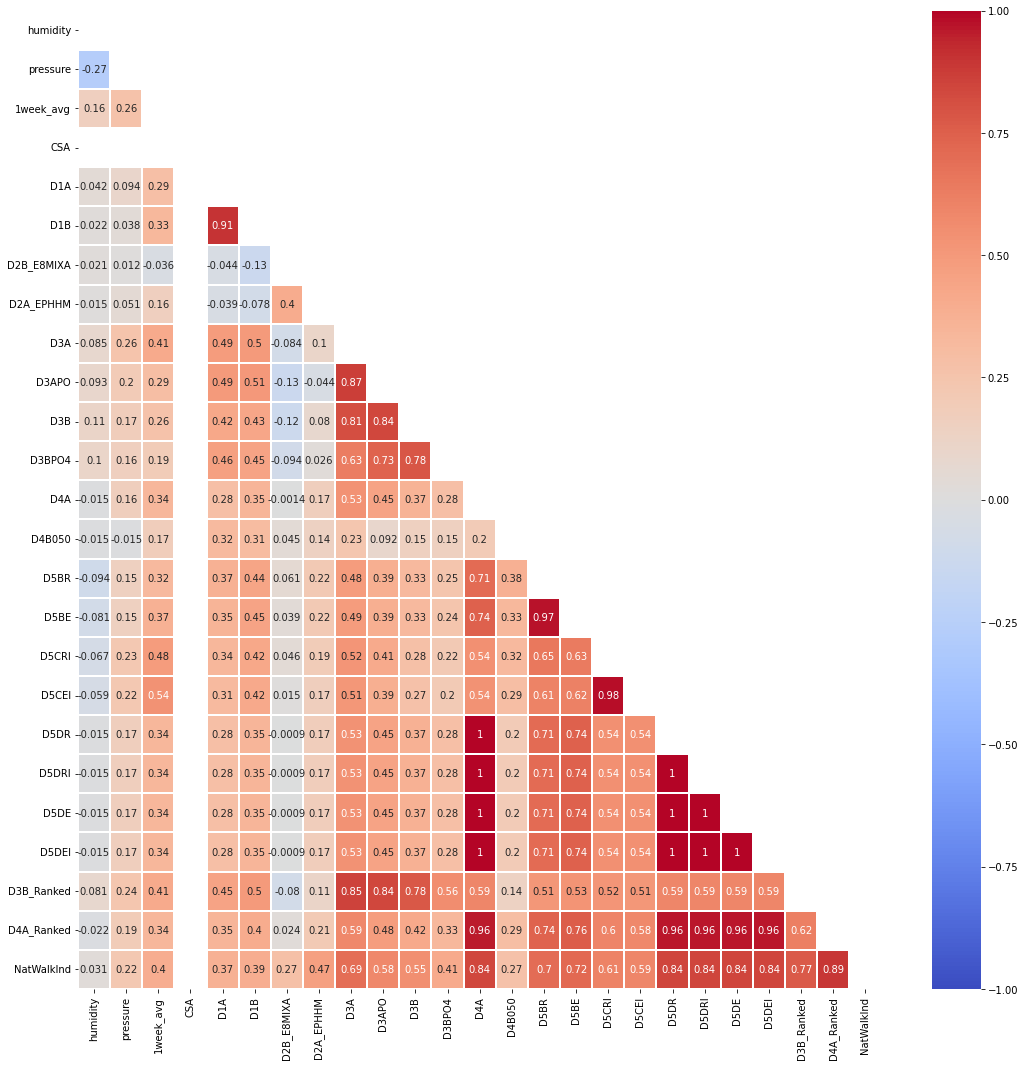

In [128]:
#mask created by jeff, taken from lessons
#shared by Nate during regression hack-a-thon
mask = np.zeros_like(df_subset.corr())
mask[np.triu_indices_from(mask)] = True

# # inspiration for heatmap parameters comes from jeff's work
plt.figure(figsize=(18,18))

sns.heatmap(
     df_subset.corr(),
     cmap='coolwarm',
     annot=True,
     mask=mask,
     vmin=-1.,
     vmax=1.,
     linewidths=.01,
     center=0
 );

So this model contains these variables after the second drop of variables below....

    'humidity', 'pressure', 'location_type', '1week_avg', 
    'CSA', 'D1A', 'D1B', 'D3A',  'D3APO', 'D3B', 
    'D4A', 'D5BR', 'D5BE', 'D5CRI',
    'D5CEI','D5DR', 'D5DRI', 'D5DE', 'D5DEI'


In [129]:
#Drop #2
#Drop TOO LOW CORR WITH 1week_avg: D2B_E8MIXA (-.03), D2A_EPHHM (.16), D4B050 (.17), D3BPO4 (.19)
#Drop Higher corr with other model variables than with 1week_avg: D3B_Ranked, NatWalkIng, D4A_Ranked
#drop_cols2=[]

df_subset2 = df_subset.drop(columns=['D2B_E8MIXA', 'D2A_EPHHM', 'D4B050', 'D3BPO4', 'D3B_Ranked', 'NatWalkInd', 'D4A_Ranked'])

In [130]:
df_subset2.head(2)

,location_type,humidity,pressure,1week_avg,CSA,D1A,D1B,D3A,D3APO,D3B,D4A,D5BR,D5BE,D5CRI,D5CEI,D5DR,D5DRI,D5DE,D5DEI
2,outside,3.0,1003.45,9.61,348.0,5.331445,13.566865,27.35580,19.272257,182.263862,0.0,118588,86030,0.402163,0.499301,0.000064,0.099344,0.000064,0.085859
4,outside,2.0,1001.91,10.17,348.0,3.175180,8.772803,17.69095,17.690950,83.242265,0.0,146904,88627,0.623714,0.712970,0.000080,0.123065,0.000066,0.088451


In [131]:
x_drop=['1week_avg', 'location_type', 'CSA']

In [132]:
X = df_subset2.drop(columns=x_drop)
X.shape

(474, 16)

In [133]:
X.head(2)

,humidity,pressure,D1A,D1B,D3A,D3APO,D3B,D4A,D5BR,D5BE,D5CRI,D5CEI,D5DR,D5DRI,D5DE,D5DEI
2,3.0,1003.45,5.331445,13.566865,27.35580,19.272257,182.263862,0.0,118588,86030,0.402163,0.499301,0.000064,0.099344,0.000064,0.085859
4,2.0,1001.91,3.175180,8.772803,17.69095,17.690950,83.242265,0.0,146904,88627,0.623714,0.712970,0.000080,0.123065,0.000066,0.088451


In [134]:
y = df_subset2['1week_avg']
y.shape

(474,)

In [135]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression

In [136]:
lr = LinearRegression()

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2022)

In [138]:
cross_val_score(lr, X_train, y_train).mean()

0.3399413968310127

In [139]:
cross_val_score(lr, X_test, y_test).mean()

0.31646028507969026

In [140]:
lr.fit(X_train, y_train)

LinearRegression()

In [141]:
lr.score(X_train, y_train)

0.43425572334930607

In [142]:
lr.score(X_test, y_test)

0.47977015102300635

In [143]:
mean_squared_error(y_test, lr.predict(X_test))

13.461877268288688

Create Dummy Model using same variables as above

In [144]:
null_model = DummyClassifier()
null_model.fit(X_train, y_train)
mean_squared_error(y_test, null_model.predict(X_test))

127.72559075630254

What if we hadn't dropped those few columns above?  Would it help our model?

In [145]:
x_drop=['1week_avg', 'location_type', 'CSA']

In [146]:
X = df_subset.drop(columns=x_drop)  #note - using subset data before dropping extra few columns
X.shape

(474, 23)

In [147]:
y = df_subset2['1week_avg']
y.shape

(474,)

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2022)

In [149]:
cross_val_score(lr, X_train, y_train).mean()

0.3271831214072763

In [150]:
cross_val_score(lr, X_test, y_test).mean()

0.25041290204266764

The model is actually weaker with them in it!  Impact of multicollinearity?

In [151]:
#evaluate other air quality measures for a stronger model, use same variables before 2nd drop
drop_cols2 = [
    'id', 'lat', 'lon',  'name', 'pm_2.5','temp_f', 'temp_c', 'last_seen', 'model',
    'hidden', 'flagged', 'downgraded', 'age', 'is_owner', 
     'fips_id', 'OBJECTID', 'GEOID20', 'STATEFP',
    'COUNTYFP','TRACTCE', 'BLKGRPCE', 'CSA_Name', 'CBSA', 'CBSA_Name', 'CBSA_POP', 'CBSA_EMP', 'CBSA_WRK', 
    'Ac_Total', 'Ac_Water', 'Ac_Land', 'Ac_Unpr', 'TotPop', 'CountHU', 'HH', 'P_WrkAge', 'AutoOwn0','Pct_AO0', 'AutoOwn1', 'Pct_AO1', 
    'AutoOwn2p','Pct_AO2p','Workers', 'R_LowWageWk', 'R_MedWageWk','R_HiWageWk', 'R_PCTLOWWAGE','TotEmp', 'E5_Ret', 'E5_Off','E5_Ind', 'E5_Svc', 'E5_Ent', 
    'E8_Ret', 'E8_off', 'E8_Ind', 'E8_Svc', 'E8_Ent', 'E8_Ed', 'E8_Hlth', 'E8_Pub', 'E_LowWageWk', 'E_MedWageWk', 'E_HiWageWk',
    'E_PctLowWage', 'D1C', 'D1C5_RET', 'D1C5_OFF', 'D1C5_IND', 'D1C5_SVC', 'D1C5_ENT',
    'D1C8_RET', 'D1C8_OFF', 'D1C8_IND', 'D1C8_SVC', 'D1C8_ENT', 'D1C8_ED', 'D1C8_HLTH', 'D1C8_PUB', 'D1D', 'D1_FLAG',
    'D2A_JPHH', 'D2B_E5MIX','D2B_E5MIXA', 'D2B_E8MIX', 'D2C_TRPMX1', 'D2C_TRPMX2', 
    'D2C_TRIPEQ', 'D2R_JOBPOP', 'D2R_WRKEMP', 'D2A_WRKEMP', 'D2C_WREMLX', 'D3AAO', 'D3AMM', 'D3BAO', 'D3BMM3',
    'D3BMM4', 'D3BPO3', 'D4B025', 'D4C', 'D4D', 'D4E', 'D5AR', 'D5AE', 'D5CR', 'D5CE',
    'D2A_Ranked', 'D2B_Ranked','Shape_Length', 'Shape_Area'

]

In [152]:
df_highcorr2 = df_la.drop(columns=drop_cols2)
df_highcorr2.head(2)

,location_type,humidity,pressure,10min_avg,30min_avg,1hour_avg,6hour_avg,1day_avg,1week_avg,CSA,D1A,D1B,D2B_E8MIXA,D2A_EPHHM,D3A,D3APO,D3B,D3BPO4,D4A,D4B050,D5BR,D5BE,D5CRI,D5CEI,D5DR,D5DRI,D5DE,D5DEI,D3B_Ranked,D4A_Ranked,NatWalkInd
0,inside,17.0,1012.79,0.86,0.81,1.21,2.22,1.62,2.35,348.0,7.617253,10.800176,0.739722,0.769949,47.203383,29.919279,350.517864,103.513633,91.2,0.713611,124964,150137,0.383448,0.503080,0.000068,0.104685,0.000111,0.149839,20,20,19.166667
1,inside,11.0,1002.99,0.22,0.30,0.35,1.32,1.10,2.25,348.0,5.331445,13.566865,0.773923,0.807735,27.355800,19.272257,182.263862,51.786045,0.0,0.393098,118588,86030,0.402163,0.499301,0.000064,0.099344,0.000064,0.085859,19,20,19.166667


In [153]:
df_subset3 =df_highcorr2[df_highcorr2['location_type']=='outside']

In [154]:
df_subset3['location_type'].value_counts()

outside    474
Name: location_type, dtype: int64

In [155]:
def corr_fun(cor_var):
#Look at correlations of everything with 10min_avg

    plt.figure(figsize=(16,14))

    sns.heatmap(
        df_subset3.corr()[[cor_var]].sort_values(by=cor_var, ascending=False),
        annot=True
    )

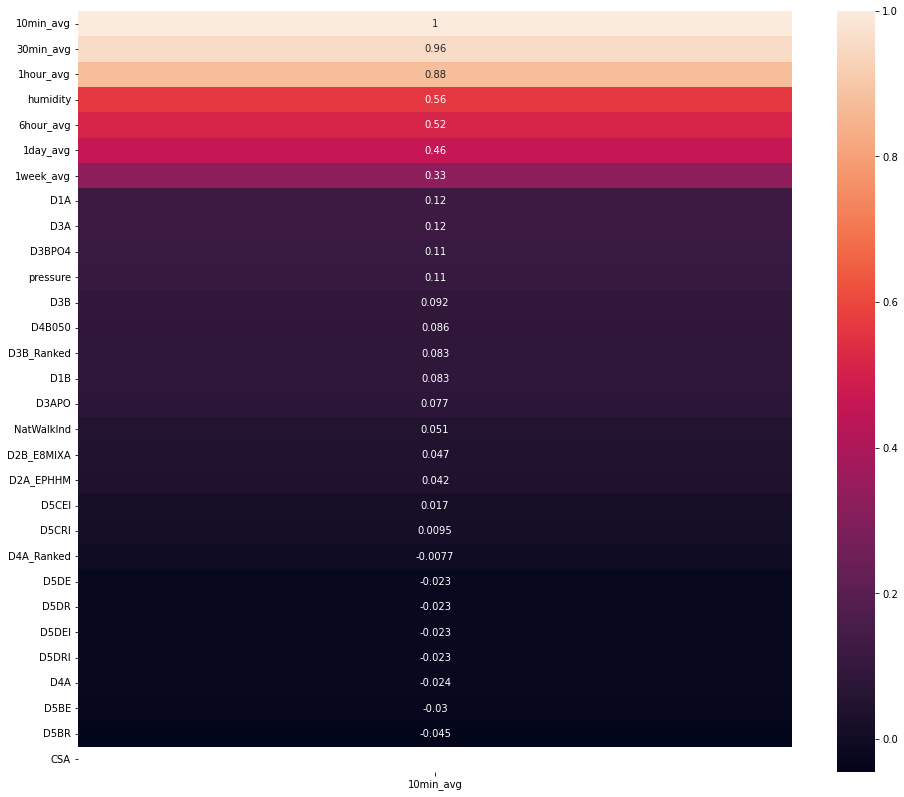

In [156]:
#Look at correlations of everything with 10min_avg
corr_fun('10min_avg')

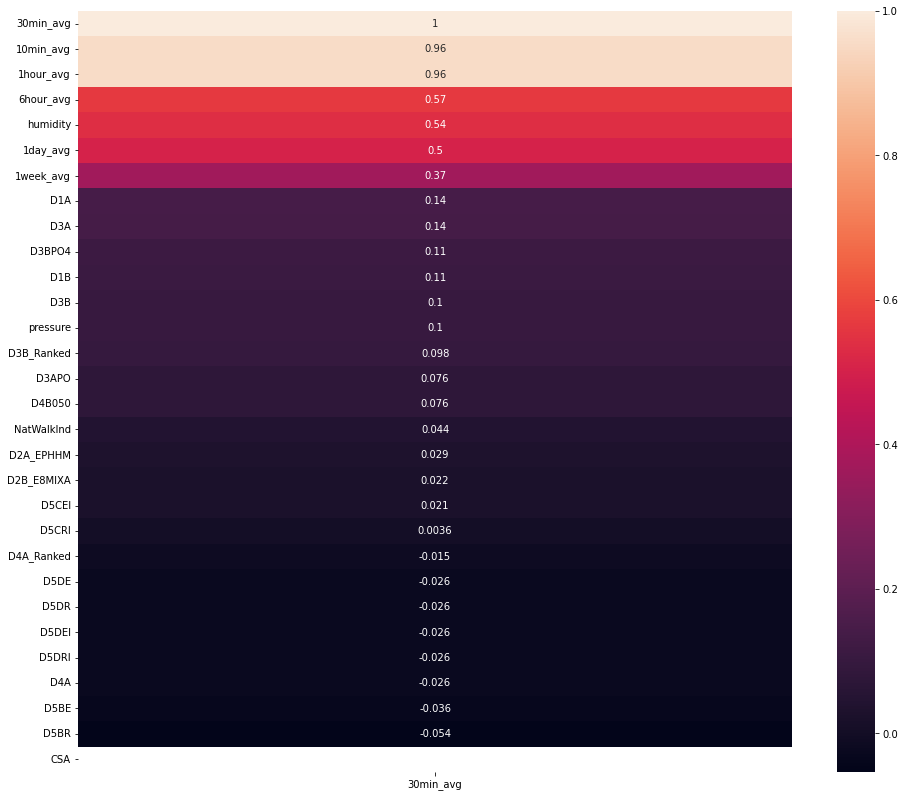

In [157]:
#Look at correlations of everything with 30min_avg
corr_fun('30min_avg')

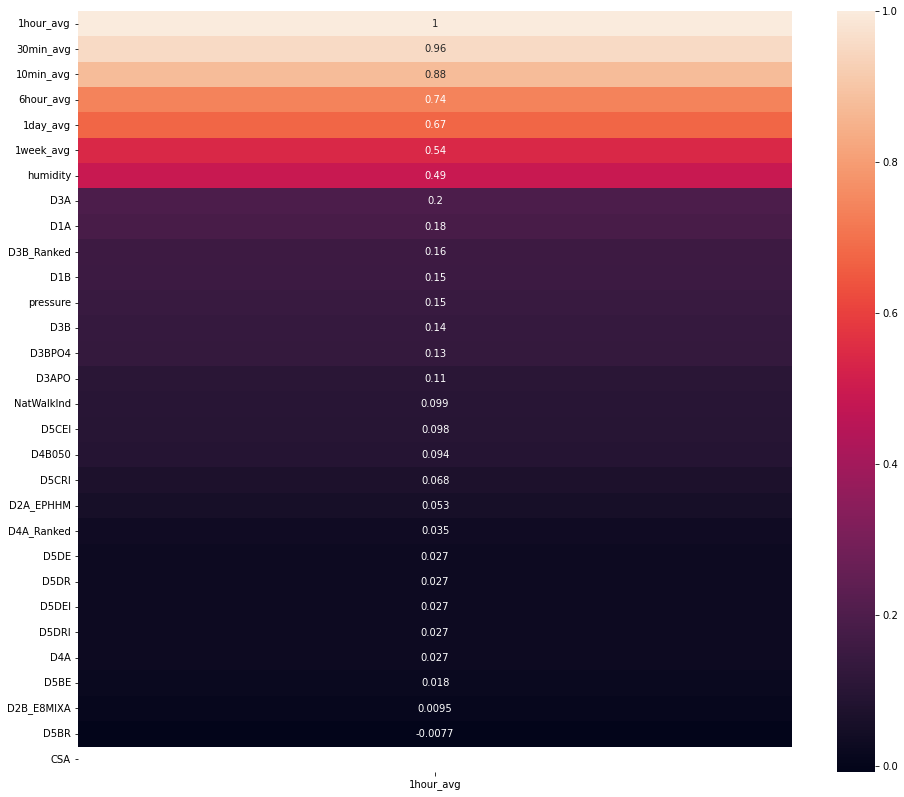

In [158]:
#Look at correlations of everything with 1hour_avg
corr_fun('1hour_avg')

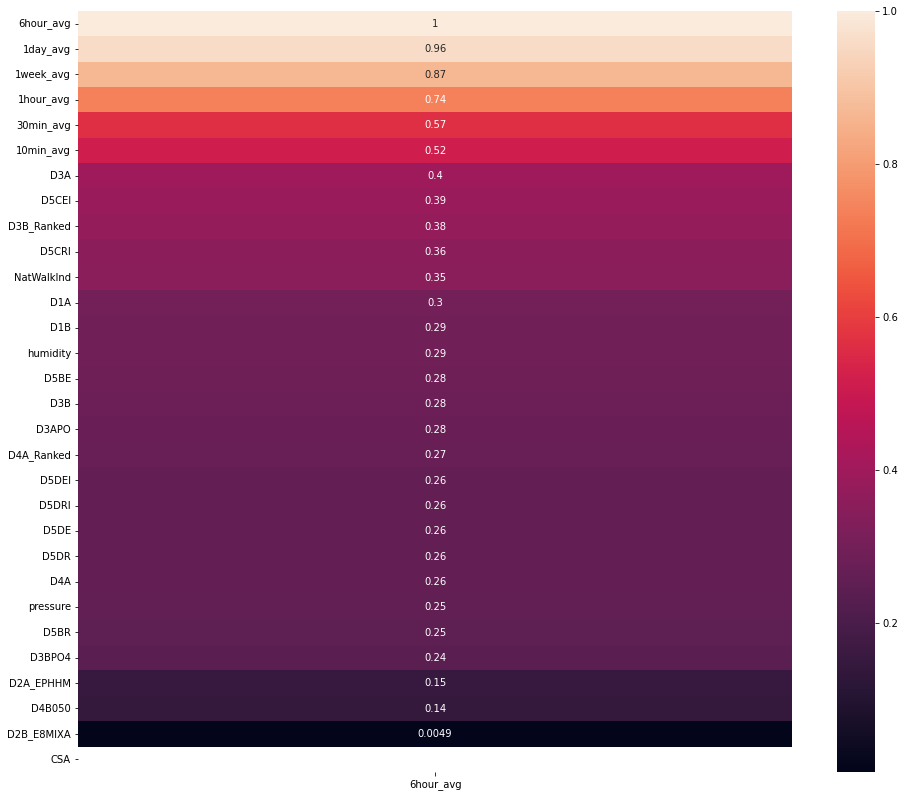

In [159]:
#Look at correlations of everything with 6hour_avg
corr_fun('6hour_avg')

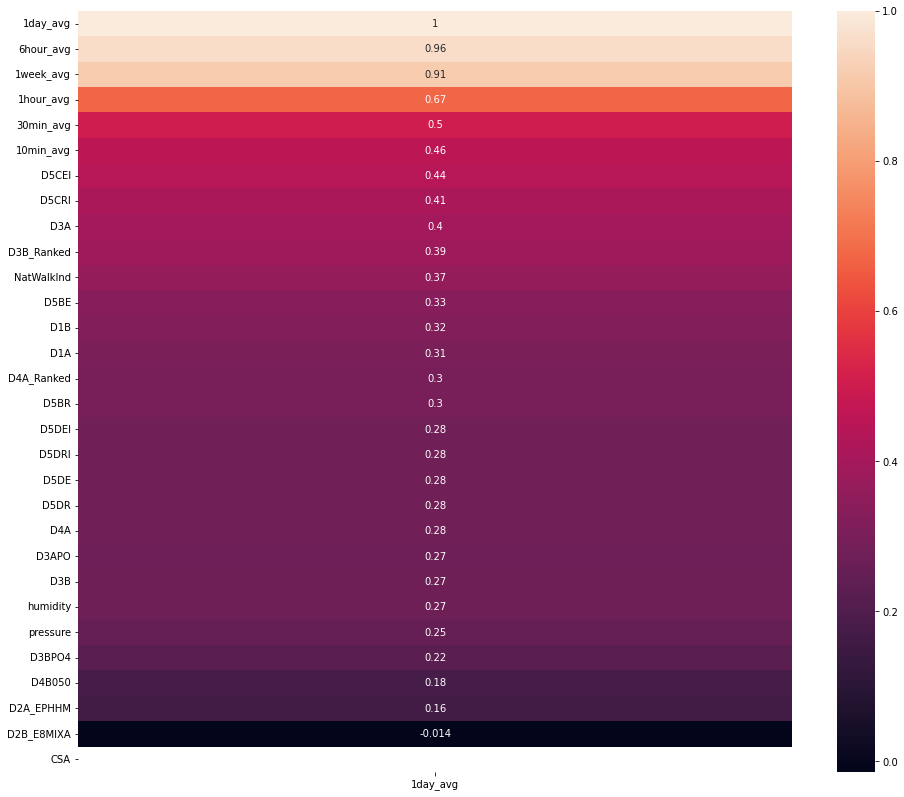

In [160]:
#Look at correlations of everything with 1day_avg
corr_fun('1day_avg')

In [161]:
#Model #2 - drop other time measures but build model on 1day_avg

x_drop=['1week_avg', 'location_type', 'CSA', '10min_avg', '30min_avg',
    '1hour_avg', '6hour_avg', '1day_avg',]

In [162]:
X = df_subset3.drop(columns=x_drop)

In [163]:
y = df_subset3[['1day_avg']]

In [164]:
lr2 = LinearRegression()

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2022)

In [166]:
cross_val_score(lr2, X_train, y_train).mean()

0.21455430051323784

In [167]:
cross_val_score(lr2, X_test, y_test).mean()

0.18981841223344112

Try a KNN Model

In [168]:
from sklearn.preprocessing import StandardScaler

In [169]:
X = df_subset2.drop(columns=x_drop)

KeyError: "['10min_avg' '30min_avg' '1hour_avg' '6hour_avg' '1day_avg'] not found in axis"

In [ ]:
y = df_subset2['1week_avg']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2022)

In [ ]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train_sc, y_train)
knn.score(X_train_sc, y_train)

ValueError: Unknown label type: 'continuous'

In [ ]:
knn.score(X_test_sc, y_test)

AttributeError: 'KNeighborsClassifier' object has no attribute 'n_samples_fit_'

In [ ]:
cross_val_score(knn, X_train_sc, y_train, cv=10).mean()

C:\Users\sarah\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sarah\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sarah\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 198, in fit
    return self._fit(X, y)
  File "C:\Users\sarah\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 420, in _fit
    check_classification_targets(y)
  File "C:\Users\sarah\anaconda3\lib\site-

nan